In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ModuleNotFoundError: No module named 'cartopy'

In [5]:
main_path = '/Users/jeppegrejspetersen/Code/Final_project_AppML/'

In [ ]:
t2m = xr.open_dataset(main_path + '/era5/' + '/era5_1940_temperature_2m.nc')
geo = xr.open_dataset(main_path + '/era5/' + '/era5_1940_geo500hpa.nc')
mslp = xr.open_dataset(main_path + '/era5/' +'/era5_1940_mean_sea_level_pressure.nc')
t850 = xr.open_dataset(main_path + '/era5/' + '/era5_1940_temperature_850hPa.nc')
prec = xr.open_dataset(main_path + '/era5/' + '/era5_1940_total_precipitation.nc')


In [2]:
t2m

NameError: name 't2m' is not defined

In [3]:
prec

NameError: name 'prec' is not defined

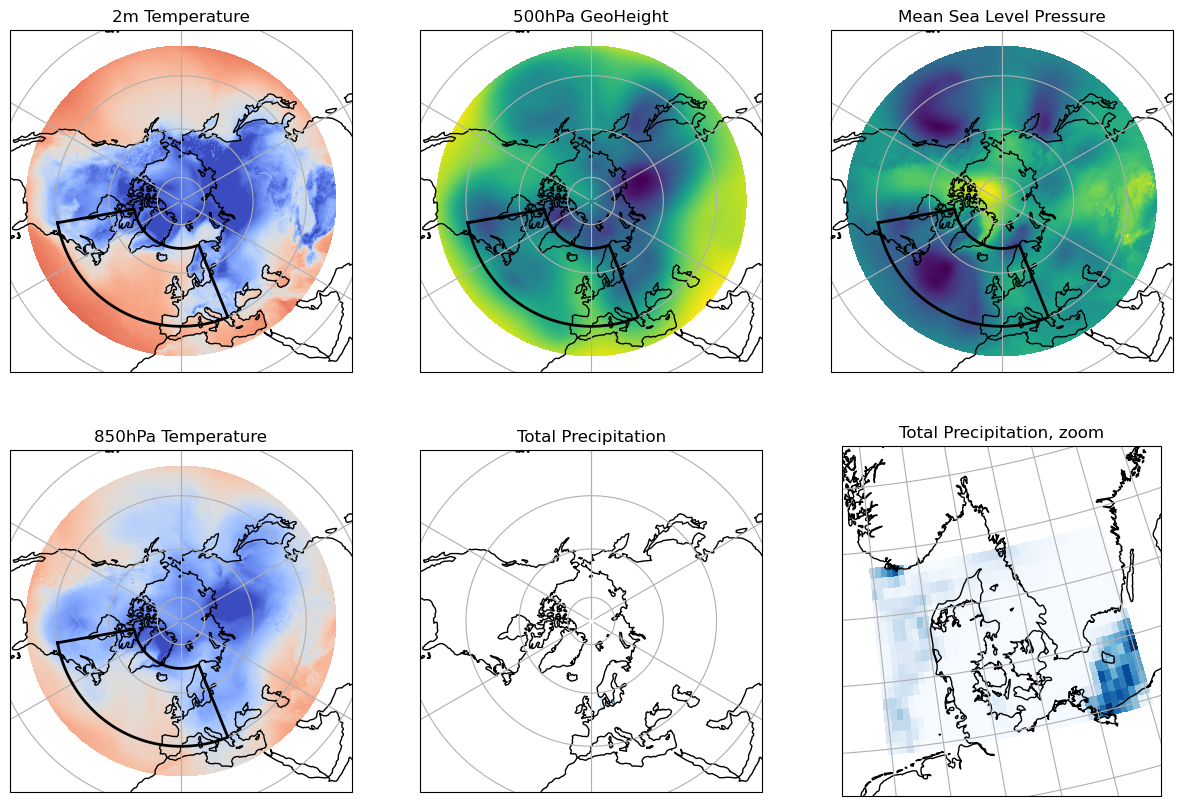

In [6]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(15, 10), subplot_kw={'projection': ccrs.NorthPolarStereo()})

for ax in axs.flatten():
    ax.coastlines()
    # ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.gridlines()

    ax.set_extent([-180, 180, 25, 90], ccrs.PlateCarree())

# Define corners
lat_min, lat_max = 40, 70
lon_min, lon_max = -80, 22

# Number of points per side
n_points = 100

# Build each side with more points
bottom_lons = np.linspace(lon_min, lon_max, n_points)
bottom_lats = np.full_like(bottom_lons, lat_min)

right_lats = np.linspace(lat_min, lat_max, n_points)
right_lons = np.full_like(right_lats, lon_max)

top_lons = np.linspace(lon_max, lon_min, n_points)
top_lats = np.full_like(top_lons, lat_max)

left_lats = np.linspace(lat_max, lat_min, n_points)
left_lons = np.full_like(left_lats, lon_min)

# Concatenate full loop
lons = np.concatenate([bottom_lons, right_lons, top_lons, left_lons])
lats = np.concatenate([bottom_lats, right_lats, top_lats, left_lats])

# Plot the smooth square on selected subplots
for ax in axs.flatten()[:-2]:
    ax.plot(lons, lats, transform=ccrs.PlateCarree(), color='black', linewidth=2)


# Plotting the data
axs[0, 0].set_title('2m Temperature')
axs[0, 0].pcolormesh(t2m.longitude, t2m.latitude, t2m.t2m[0], transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto', vmin = 273-30, vmax = 273+30)

axs[0, 1].set_title('500hPa GeoHeight')
axs[0, 1].pcolormesh(geo.longitude, geo.latitude, geo.z.isel(pressure_level = 0)[0], transform=ccrs.PlateCarree(), cmap='viridis', shading='auto')
axs[0, 2].set_title('Mean Sea Level Pressure')
axs[0, 2].pcolormesh(mslp.longitude, mslp.latitude, mslp.msl[0], transform=ccrs.PlateCarree(), cmap='viridis', shading='auto')
axs[1, 0].set_title('850hPa Temperature')
axs[1, 0].pcolormesh(t850.longitude, t850.latitude, t850.t.isel(pressure_level = 0)[0], transform=ccrs.PlateCarree(), cmap='coolwarm', shading='auto',vmin = 273-30, vmax = 273+30)
axs[1, 1].set_title('Total Precipitation')
axs[1, 1].pcolormesh(prec.longitude, prec.latitude, prec.tp[0], transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

axs[1, 2].set_title('Total Precipitation, zoom')
axs[1, 2].set_extent([5, 16, 53, 60], ccrs.PlateCarree())
axs[1, 2].pcolormesh(prec.longitude, prec.latitude, prec.tp[0], transform=ccrs.PlateCarree(), cmap='Blues', shading='auto')

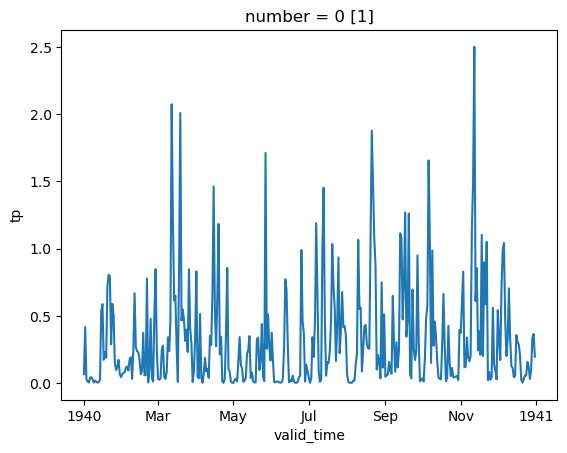

In [7]:
##make a precipt mean
prec_mean = prec.tp.mean(dim = ['longitude', 'latitude'])*1e3*4
prec_mean.plot()

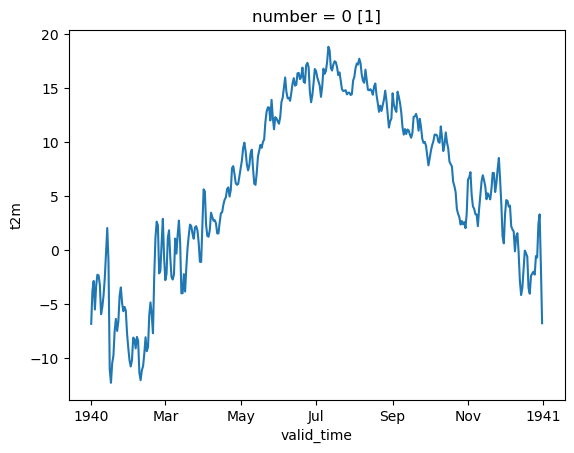

In [8]:
temp_mean = t2m['t2m'].sel(longitude=slice(5, 16), latitude=slice(60, 53)).mean(dim=['longitude', 'latitude']) - 273.15
temp_mean.plot()

(array([62., 38., 21., 19., 15.,  7., 17., 11.,  7., 14.,  9., 11.,  6.,
        14.,  8.,  4.,  6.,  3., 10.,  4.,  5.,  4.,  3.,  5.,  2.,  2.,
         4.,  4.,  5.,  1.,  1.,  2.,  1.,  4.,  3.,  2.,  0.,  2.,  0.,
         4.,  0.,  3.,  3.,  2.,  2.,  1.,  0.,  2.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.02503711, 0.05007422, 0.07511133, 0.10014844,
        0.12518555, 0.15022266, 0.17525977, 0.20029688, 0.22533399,
        0.2503711 , 0.27540821, 0.30044532, 0.32548243, 0.35051954,
        0.37555665, 0.40059376, 0.42563087, 0.45066798, 0.47570509,
        0.5007422 , 0.52577931, 0.55081642, 0.57585353, 0.60089064,
        0.62592775, 0.65096486, 0.67600197, 0.70103908, 0.72607619,
        0.7511133 , 0.7761

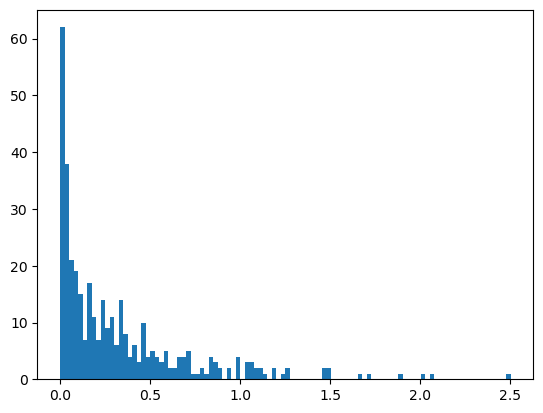

In [10]:
plt.hist(prec_mean.values, bins = 100)

(array([10.,  2.,  4.,  7.,  3., 10., 10., 11., 16., 27., 20., 23., 25.,
        37., 46., 39., 32., 29., 10.,  5.]),
 array([-6.90775537, -6.51645899, -6.1251626 , -5.73386574, -5.34256935,
        -4.95127296, -4.55997658, -4.16868019, -3.7773838 , -3.38608742,
        -2.99479103, -2.60349464, -2.21219778, -1.82090139, -1.42960501,
        -1.03830862, -0.64701223, -0.25571585,  0.13558054,  0.52687693,
         0.91817331]),
 <BarContainer object of 20 artists>)

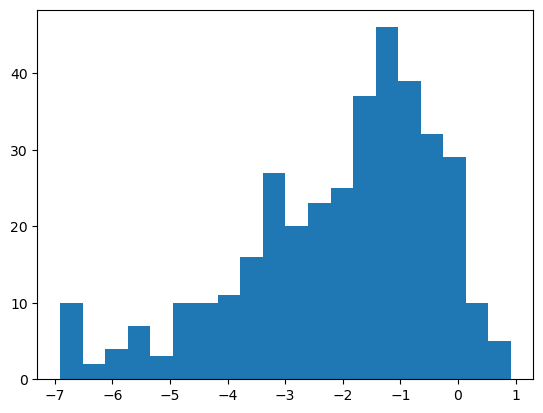

In [14]:
plt.hist(np.log(prec_mean.values + 0.001), bins = 20)